# Chi-square
### The Chi-square test of independence determines if there is a significant relationship between two categorical (i.e. nominal or ordinal) (with two or more mutually exclusive groups) variables. Hence, the null hypothesis is that no relationship exists between the two variables.
* Non-parametric; does not require assumptions about population parameters
* Compares difference in population proportions between groups
* Contingency table of observed values is required.
### It is a test to indicate if the variables are related (i.e. correlated). If they are correlated, we can use the phi coefficient to further determine the strength of the correlation.
* The Chi-square test is sensitive to sample size (i.e. asymptotic)
* As the sample size increases, the absolute differences become a smaller proportion of the expected value.
* The outcome is that a strong association may not surface if sample size is small.
* In large sample sizes, statistical significance may surface while the association is not substantial (i.e. very weak)

## Building of the Corrected Cramer's V function



# Cramer’s V
### Useful to determine the strength of a relationship between categorical variables. Linking the discussion back to Chi-square, assuming a low p-value; presence of dependence(statistically significant dependence between variables). The Cramer V’s helps indicate the strength of this dependence. Would be useful in situations where a statistically significant chi-square could be the result of large sample size instead of substantive relationship between the variables.
* robust against large sample size
* compares the strength of relationship between two categorical variables
* variables should have two or more unique values per category
* if there are only two unique measurement levels, it is the same as Phi Coefficient
* the coefficient ranges from 0 to 1

In [204]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab,correction=True)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
   
cramers_results = np.array(rows)
cramer_DF = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
cramer_DF

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
gender,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Partner,0.0,1.00,0.20,0.00,0.02,0.00,0.02,0.02,0.03,0.02,0.02,0.02,0.09,0.00,0.03
Dependents,0.0,0.20,1.00,0.00,0.00,0.03,0.04,0.03,0.03,0.03,0.02,0.02,0.06,0.01,0.02
PhoneService,0.0,0.00,0.00,1.00,1.00,0.20,0.03,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.00
MultipleLines,0.0,0.02,0.00,1.00,1.00,0.16,0.05,0.06,0.06,0.05,0.07,0.07,0.01,0.03,0.03
InternetService,0.0,0.00,0.03,0.20,0.16,1.00,0.52,0.50,0.50,0.52,0.51,0.51,0.04,0.14,0.10
OnlineSecurity,0.0,0.02,0.04,0.03,0.05,0.52,1.00,0.52,0.51,0.54,0.50,0.50,0.09,0.12,0.09
OnlineBackup,0.0,0.02,0.03,0.03,0.06,0.50,0.52,1.00,0.52,0.52,0.51,0.51,0.07,0.10,0.08
DeviceProtection,0.0,0.03,0.03,0.03,0.06,0.50,0.51,0.52,1.00,0.53,0.54,0.54,0.09,0.10,0.08
TechSupport,0.0,0.02,0.03,0.03,0.05,0.52,0.54,0.52,0.53,1.00,0.51,0.51,0.11,0.11,0.09


In [192]:
crosstab =pd.crosstab(data['StreamingMovies'],data['DeviceProtection'], rownames=None, colnames=None)
crosstab

DeviceProtection,No,No internet service,Yes
StreamingMovies,,,
No,1950,0,827
No internet service,0,1512,0
Yes,1137,0,1595


In [193]:
crosstab =np.array(pd.crosstab(data['StreamingMovies'],data['DeviceProtection'], rownames=None, colnames=None))

In [203]:
# Details
print(f'chi-square statistic: {chi2_contingency(crosstab)[0]}')
print(f'p-value: {chi2_contingency(crosstab)[1]}')
print(f'degree of freedom: {chi2_contingency(crosstab)[2]}')
print('expected contingency table') 
print(chi2_contingency(crosstab)[3])

chi-square statistic: 7603.816024490806
p-value: 0.0
degree of freedom: 4
expected contingency table
[[1220.99401795  598.03788634  957.96809571]
 [ 664.79760718  325.61515454  521.58723829]
 [1201.20837488  588.34695912  942.444666  ]]


# Phi Coefficient
* compares the strength of the relationship between two categorical variables
* variables only two unique measurement levels
* the coefficient ranges from 0 to 1

In [205]:
n = np.sum(np.sum(crosstab))
# minimum of rows & columns
minshape = min(crosstab.shape)-1
# Phi
chisq_stat = chi2_contingency(crosstab)[0]
Phi_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Phi Coefficient: {Phi_}")

Phi Coefficient: 0.735870369313615


# Point-biserial correlation
* Used to measure the strength and direction of the association
* between continuous & categorical variable

# ANOVA
* Compares the variance of continuous measures among multiple independent groups of variables
* Categorical & continuous variable
* can be as One-way or Two-way ANOVA
* One-way ANOVA for instances where a variable consists of three or more independent levels of measurements.

In [206]:
# Create a dataframe with artifical values
# Sector Ranking, SR1 to SR9, SR1 ranked highest (more than 3 groups)
# Salary; continuous variable
SRs = ['SR1', 'SR9', 'SR2', 'SR8', 'SR3', 'SR7', 'SR4', 'SR6', 'SR5',
       'SR1', 'SR9'] 
Salary = [10000, 5000, 8000, 5500, 7500, 6000, 7000, 6500, 6800,
          11000, 5100]
rawData = pd.DataFrame({'ranks':SRs,
                        'sal':Salary })

In [207]:
# derive the groups (i.e. sector ranks)
groups = pd.unique(frame.ranks.values)
# Create a dictionary to hold respective salary of sector rank groups
statData = {grp: rawData['sal'][rawData['ranks'] == grp] for grp in groups}
stats.f_oneway(statData['SR1'], statData['SR2'], statData['SR9'])

NameError: name 'frame' is not defined

# Z-test
* Compares if two samples’ mean are different
* not used if the sample size is less than 30
* assumes sample are independent; follows normal distribution
* mean may be unknown, variance is known

In [210]:
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as ct
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

# create dataframe of salary(K) for 2 business groups
np.random.seed(123)
marketing = np.random.normal(106,2,40) # mean 106, std dev 2, sample 40
finance = np.random.normal(108,1,40) # mean 108, std dev 1, sample 40
marketingLst = marketing.tolist()
financeLst = finance.tolist()
salData = pd.DataFrame({'marketing':marketingLst, 
                        'finance':financeLst})
print('marketing median sal:', salData['marketing'].median(), '\n' 
      'finance median sal:', salData['finance'].median())

marketing median sal: 105.57074494667918 
finance median sal: 108.12250707709487


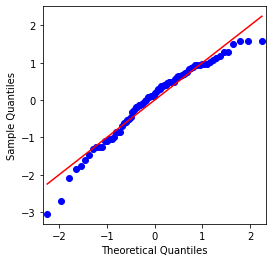

In [211]:
# combine the 2 lists to get overall salary distribution
marketingLst.extend(financeLst)
salFrame = pd.DataFrame(marketingLst,columns=['salary'])
# check normality
fig, ax = plt.subplots(figsize=(4,4))
qqplot(salFrame['salary'], fit=True, line='s',ax=ax)
plt.show()

In [213]:
# ztest
# z-score, p-value
zScore, pValue = ztest(salData['marketing'], salData['finance'])
print('zscore:', zScore, 'p-value:', pValue)

zscore: -5.508324409386266 p-value: 3.6226534235582006e-08


Interpretation of results:
The null hypothesis is rejected, with a p-value less than 0.05. There is a significant difference in the mean salary between the two groups.

# t-test
* Similar to z-test, but is applicable for when sample size is less than 30
* little difference between z-test & t-test if sample sizes are large
* assumes sample follows a normal distribution with unknown mean & variance
* One sample t-test compares the mean with a population value
* Two sample t-test tests if the means of two samples are equal
* Differentiated by equal variance t-test and non-equal variance t-test (i.e. Welch’s test)

### t-test example 1 (one-sample)
Is there a difference between the mean of marketing group salary with the company mean salary?

In [215]:
np.random.seed(42)
marketing2 = np.random.normal(106,2,20) # mean 106, std dev 2, sample 20
finance2 = np.random.normal(108,2,20) # mean 108, std dev 1, sample 20
# Normality can be checked by shew and kurtosis besides qqplot
# For normally distributed data, the skewness should be about zero.
print('marketing2 skew:', stats.skew(marketing2), '\n'
      'finance2 skew:', stats.skew(finance2))
# value of kurtosis measure for normal distr is 3
print('marketing2 kurtosis:', stats.kurtosis(marketing2), '\n'
      'finance2 kurtosis:', stats.kurtosis(finance2))

marketing2 skew: 0.022653680547844147 
finance2 skew: 0.40441143962841136
marketing2 kurtosis: -0.5444692608577588 
finance2 kurtosis: -0.2237789786289155


In [216]:
# 1 sample t-test, tests population mean salary 106
stats.ttest_1samp(a=marketing2, popmean=106)


Ttest_1sampResult(statistic=-0.7979664336555643, pvalue=0.434750588427116)

### Interpretation of results:
With a p-value greater than 0.05, fail to reject the null hypothesis of the mean salary of the population being 106.

### t-test example 2 (two-sample; similar variance)
Is there a difference in the mean salaries between the two groups?

In [218]:
# check if variance similar
np.var(marketing2)/np.var(finance2)

0.983518952085017

In [219]:
#With the ratio of the variance is less than 4:1, perform the t-test, else, perform Welch’s t-test (i.e. set equal_var to False.)
# Can assume equal variance
stats.ttest_ind(a=marketing2, b=finance2, equal_var=True)

Ttest_indResult(statistic=-2.9696677632634105, pvalue=0.0051419940594444)

# Pearson correlation
## Correlation coefficients give a measure of the linear relationship between the two variables. If using .corr() via pandas, the default correlation method is Pearson.
* The range between negative one to one (negative to positive correlation respectively)
* the formula for calculating the correlation coefficient standardizes the variables, changes in scale or units of measurement will not affect its value.
## Pearson correlation is a measure of the strength and direction of the linear relationship between two continuous variables. It relies on four key assumptions:
* Data is interval or ratio. These types of continuous data are important for how correlation assumes values in variables are related. Ordinal or Categorical variable coding won’t work.
* Pearson only works with linear data.
* No outliers in data.
* Data is normally distributed.
* Data must be homoscedastic. Homoscedasticity assumes that data is equally distributed about the regression line
## Spearman correlation is non-parametric. It relies on nearly all the same assumptions as Pearson, but it doesn’t rely on normality. The scores on one variable must be monotonically related to the other variable. Can be used on pairs of continuous (that don’t follow linear relationship) or ordinal variables.
## Kendall rank correlation is non-parametric. It measures the strength of dependence between two variables. It can be used with ordinal or continuous data.
## Effect strength: Cohen’s standard may be applied to the coefficient to determine the strength of the effect.


# Paired t-test
* Determines if there is a statistically significant difference between paired continuous variables.
* between two dependent samples (e.g. test scores before and after)
* tests whether the changes tend to be in the positive or negative direction